In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from plot_prop import *
from plot_projections import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from major_axis import get_major_axis

In [31]:
def align_prop(propeller_coords):
	_, _, _, highest_point, _ = extreme_points(propeller_coords)
	rotation_point = highest_point.copy()
	rotation_point[2] = 0

	theta =  np.arccos( (rotation_point @ [0,1,0]) / (np.linalg.norm(rotation_point) * np.linalg.norm([0,1,0]))) #* 180/np.pi
	ct, st = np.cos(theta), np.sin(theta)
	rotz = np.array(((ct,-st, 0), (st, ct, 0), (0,0,1)))

	rot_proj = rotz @ highest_point
	phi =  - np.arccos( (rot_proj @ [0,0,1]) / (np.linalg.norm(rot_proj) * np.linalg.norm([0,0,1]))) #* 180/np.pi
	cp, sp = np.cos(phi), np.sin(phi)
	rotx = np.array(((1, 0, 0), (0, cp, -sp), (0,sp,cp)))

	propeller_coords = propeller_coords.apply(lambda x: rotx @ rotz @ x.values, axis = 1)

	return propeller_coords

### Pre-processing

In [34]:
propeller = pd.read_csv('aerostar_data.csv')

propeller = center_prop(propeller)
print(type(propeller))
propeller = align_prop(propeller)
print(type(propeller))
print(propeller)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
0         [-2.500215339621357, -0.34855664607589754, 3.1...
1         [-2.5344789164799972, -0.10450033333258252, 3....
2         [-2.49980958859085, -0.02963921370682791, 3.11...
3         [-2.49980958859085, -0.02963921370682791, 3.11...
4         [-2.5344789164799972, -0.10450033333258252, 3....
5         [-2.5346571031393226, 0.1947675155248033, 3.11...
6         [-2.49980958859085, -0.02963921370682791, 3.11...
7         [-2.5346571031393226, 0.1947675155248033, 3.11...
8         [-2.500215339621357, 0.2892027169629748, 3.101...
9         [-2.500215339621357, 0.2892027169629748, 3.101...
10        [-2.5346571031393226, 0.1947675155248033, 3.11...
11        [-2.535545822265356, 0.4917389086893906, 3.076...
12        [-2.500215339621357, 0.2892027169629748, 3.101...
13        [-2.535545822265356, 0.4917389086893906, 3.076...
14        [-2.501427987921076, 0.6043565285264659, 3.049...
15        [-2.501427987921

In [33]:
propeller.reset_index(drop=True)
propeller_coords = propeller.drop_duplicates(subset=None, keep='first', inplace=False)
propeller_coords = propeller_coords.reset_index(drop=True)

max_point, min_point, middle_point, highest_point, lowest_point = extreme_points(propeller_coords)
vect_length                = vect_blade(max_point, min_point) 
dmiddle, dhighest, dlowest = d_blade(vect_length, middle_point, highest_point, lowest_point)
upper_blade, lower_blade   = blade_alone(propeller_coords, vect_length, dmiddle)
vect_out, vect_side, hub_inner_radius = get_major_axis(propeller_coords, middle_point, vect_length)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
0         [-2.500215339621357, -0.34855664607589754, 3.1...
1         [-2.5344789164799972, -0.10450033333258252, 3....
2         [-2.49980958859085, -0.02963921370682791, 3.11...
3         [-2.49980958859085, -0.02963921370682791, 3.11...
4         [-2.5344789164799972, -0.10450033333258252, 3....
5         [-2.5346571031393226, 0.1947675155248033, 3.11...
6         [-2.49980958859085, -0.02963921370682791, 3.11...
7         [-2.5346571031393226, 0.1947675155248033, 3.11...
8         [-2.500215339621357, 0.2892027169629748, 3.101...
9         [-2.500215339621357, 0.2892027169629748, 3.101...
10        [-2.5346571031393226, 0.1947675155248033, 3.11...
11        [-2.535545822265356, 0.4917389086893906, 3.076...
12        [-2.500215339621357, 0.2892027169629748, 3.101...
13        [-2.535545822265356, 0.4917389086893906, 3.076...
14        [-2.501427987921076, 0.6043565285264659, 3.049...
15        [-2.501427987921

TypeError: drop_duplicates() got an unexpected keyword argument 'subset'

### Projections

In [ ]:
nb_seg = 3
size = 10  #propeller
#size = 3   #aerostar
planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)

In [52]:
all_plane_points = get_points(propeller_coords, planes, size)

In [53]:
one_plane_point = all_plane_points[0]

In [58]:
def projection_results(one_plane_point):
    
    side1_border, side2_border, _, _, _ = extreme_points(one_plane_point)
    
    param_sides = find_separation_plane(one_plane_point.values)
    
    right_points, left_points = assign_points(param_sides, one_plane_point)
    
    right_points = add_border_points(right_points, side1_border, side2_border)
    left_points  = add_border_points(left_points,  side1_border, side2_border)
    
    right_popt = interpolate_points(right_points)
    left_popt  = interpolate_points(left_points)
    
    return right_popt, right_points, left_popt, left_points

In [61]:
right_popt, right_points, left_popt, left_points = projection_results(one_plane_point)

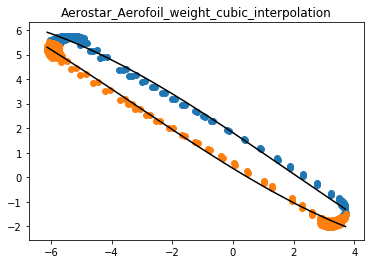

In [63]:
plot_interpolation_both_sides(right_popt, right_points, left_popt, left_points, "Aerostar_Aerofoil_weight_cubic_interpolation")